In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.metrics import confusion_matrix
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import FunctionTransformer
np.set_printoptions(precision=3, suppress=True)
import warnings
warnings.filterwarnings("ignore")

## Pre-processing

In this set, we will look at pre-processing data. In other words, making our data nicer and easier to handle. 

Lets consider a titanic data set from `sklearn`:

In [2]:
dataset=datasets.fetch_openml("titanic", version=1)
X,y= dataset.data, dataset.target
X.shape

(1309, 13)

In [95]:
print(dataset['DESCR'])

**Author**: Frank E. Harrell Jr., Thomas Cason  
**Source**: [Vanderbilt Biostatistics](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html)  
**Please cite**:   

The original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

Thomas Cason of UVa has greatly updated and improved the titanic data frame using the Encyclopedia Titanica and created the dataset here. Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new variable

In [96]:
X

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [97]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [98]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(6), object(5)
memory usage: 115.4+ KB


As you can see we have different types of data. Moreover, we can see some data is missing.

In [3]:
X.isna().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### Missing Data

As we can see, there are a lot of missing data. There are a few ways to deal with that:

1. If you have a small amount of missing data relative to the size of your dataset, deleting data points with missing data is an easy way to deal with this.
2. If you have a feature with a lot of data missing, then deleting that feature might work well, since it can't be used to predict much.
3. Another way to deal with missing data is to use imputer. This is when you replacing missing values with some kind of centralizer (mean, median, etc). This can work if not too many values missing from the feature. Note that using imputer is not always a good choice, think if central values are most commmon values.
4. If you are dealing with time series, forward fill or backward fill can work. Here you replace missing values with existing value either either before or after missing position. This of course is not a good choice if you have large gaps of missing values. (Ex. `df['FeatureName'].fillna(method='ffill')` or `df['FeatureName'].fillna(method='bfill')` )

In the above Titanic set, we have 1309 datapoint. Notice that features like "cabin", "boat" and "body" are missing majority of values. These would be ok features to ignore.

Now let's focus on "age" and "fare" columns. Here I will use medians to replace missing values. As with other models, `fit` calculates needed changes, `transform` applies the changes and `fit_transform` does both at the same time.


In [19]:
X_num=X.loc[:,["fare", "age"]]
imp_median = SimpleImputer(strategy='median')
X_num.iloc[:,:]=imp_median.fit_transform(X_num.iloc[:,:])
X_num.isna().sum()

fare    0
age     0
dtype: int64

We can use `mean` instead of median for real type data.

For a lot of data sets, it is a good idea to standardize or normalize your features. This means to rescale each feature so it has properties of the standard normal distribution. This is quite useful if your features have different ranges. Without rescaling normally features with large range will dominate. 

In our case the values of "fare" and "age" are too different. Fare can reach over values over 200, but age can't. So, we can't compare them fairly. To fix that we can use scaling. Two common ways to scale the data are normalization and standartization:

1. In stardatization, we assume normal distribution and we standartize to standard normal distribution by applying $$z^{(i)}=\frac{x^{(i)}-\mu}{\sigma}$$ to the whole data. 

2. In normalization we find maximum and minimum of each feature and normalize as follows:
$$ \hat{x}^{(i)}=\frac{x^{(i)}-\min}{\max-\min}.$$

Your test data has to be scaled as well. However, you need to use the parameters from the train data instead. In other words, if we used standardization, we should use mean and standart deviation of the training set to standardize the testing set.

Here I will use standartization.
In Python to do this, normally we create Standard Scaler and use it on our training set to find means and standard deviation of each column (`fit`) and then standardize it (`transform`). Then use the same parameters (mean and std. deviation from training set) and standardize the test set (so only `transform`).

So let's standartize our same two columns.

In [20]:
sc=StandardScaler()

X_num.iloc[:,:]=sc.fit_transform(X_num.iloc[:,:])
X_num

,fare,age
0,3.442584,-0.039005
1,2.286639,-2.215952
2,2.286639,-2.131977
3,2.286639,0.038512
4,2.286639,-0.349075
...,...,...
1304,-0.364003,-1.163009
1305,-0.364003,-0.116523
1306,-0.503774,-0.232799
1307,-0.503774,-0.194040


Standard scaler is most common one and it works well with regression models, SVM, PCA, etc. 

To apply normalization, you can use `.MinMaxScaler()` from the same `sklearn.preprocessing` library. If you think you data is far from being normal, this might be scaler to use. 

Both above scalers are sensitive to outliers. If you have alot of outliers, using Robust Scaler is preferred: `.RobustScaler()`: $$\hat{x}^{(i)}=\frac{x^{(i)}-Q_1}{Q_3-Q_1},$$
where $Q_1$ and $Q_3$ are first and third quartiles. Main drawback of this method is that it doesnt work well with very skewed data.

### Outliers

Sometimes we would like to see if we have outliers and/or remove outliers. There are a few ways of doing it. We can look at the boxplot that can show us our outliers. Here how to understand the box plot:
1. Middle line inside the box is median
2. The bottom and top line of the box is First and Third Quartile, and the distance berween these two quartiles is called IQR
3. Each whisker has size equal to 1.5*IQR.
4. Anything outside the whiskers is considered to be outlier.

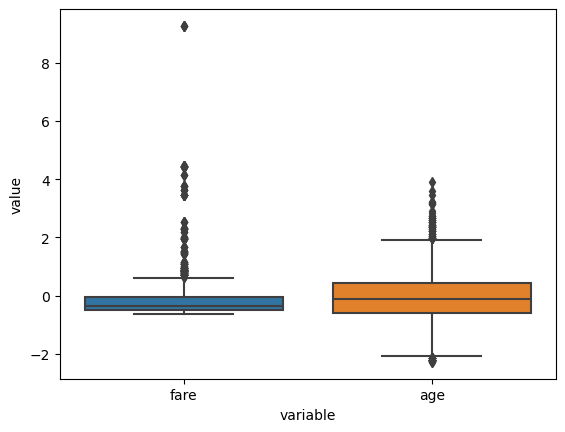

In [21]:
sns.boxplot(x="variable", y="value", data=pd.melt(X_num))

plt.show()

Another way to see outliers is to use z-score. Generally, if the absolute value of z-score is higher than 3 or 3.5, the data point is considered to be an outlier.

In [25]:
Outliers=X_num[(~X_num['fare'].between(-3.5,3.5)) | (~X_num['age'].between(-3.5,3.5))]
Outliers.count()

fare    31
age     31
dtype: int64

Let's remove these points from X_num:"

In [26]:
X_num=X_num[(X_num['fare'].between(-3.5,3.5)) & (X_num['age'].between(-3.5,3.5))]
X_num

,fare,age
0,3.442584,-0.039005
1,2.286639,-2.215952
2,2.286639,-2.131977
3,2.286639,0.038512
4,2.286639,-0.349075
...,...,...
1304,-0.364003,-1.163009
1305,-0.364003,-0.116523
1306,-0.503774,-0.232799
1307,-0.503774,-0.194040


Other methods of detecting outliers are:

1. Isolation forest, which is based on Random Forest Model and is a good way of doing it if your dataset is huge and have many features.

2. DBScan, analysis clustering of your data to find outliers.

What to do with outliers?
Sometimes removing them is ok. Sometimes, replacing them with some values (mean, median, $Q1-1.5*IQR$, $Q3+1.5*IQR$). Sometimes we just keep them. Usually it depends on dataset and why we have outliers there. 

### Categorical data

Most models use numerical values to train. So how do we deal with categorical data? 
If the data is binary, we can always use "0" and "1". If we have 3 categories, we can try using "0", "1" and "2", but that may lead to problems. This can mean that category "1" is between categories "0" and "2", but in reality there shouldn't be order to our categories. One solution to this is "One Hot Encoding". Here we create an array for each data point full of zeros and a single "1" that represents category. In other words, instead of "0", "1" and "2", we have "[1,0,0]", "[0,1,0]" and "[0,0,1]". 

Let's take "embarked" amnd "sex" features. In "sex" feature we have only 2 values, so we will map them to 0 and 1 like we did in Tutorial 3. For "embarked" feature we will use One Hot Encoding. 

In [27]:
X_cat=X.loc[:,["embarked", "sex"]]

onehotenc=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

X_cat_emb=onehotenc.fit_transform(X_cat.loc[:,["embarked"]])
one_hot_df = pd.DataFrame(X_cat_emb, columns=onehotenc.get_feature_names_out(["embarked"]))

df_encoded = pd.concat([X_cat, one_hot_df], axis=1)

df_encoded = df_encoded.drop(["embarked"], axis=1)
df_encoded 

,sex,embarked_C,embarked_Q,embarked_S,embarked_nan
0,female,0.0,0.0,1.0,0.0
1,male,0.0,0.0,1.0,0.0
2,female,0.0,0.0,1.0,0.0
3,male,0.0,0.0,1.0,0.0
4,female,0.0,0.0,1.0,0.0
...,...,...,...,...,...
1304,female,1.0,0.0,0.0,0.0
1305,female,1.0,0.0,0.0,0.0
1306,male,1.0,0.0,0.0,0.0
1307,male,1.0,0.0,0.0,0.0


As a bonus, it dealt with a couple of missing values for us as well.

For binary in `sex` column, lets replace it with 0 and 1:

In [28]:
df_encoded['sex']=df_encoded.sex.map({'male':0,'female':1})
df_encoded 

,sex,embarked_C,embarked_Q,embarked_S,embarked_nan
0,1,0.0,0.0,1.0,0.0
1,0,0.0,0.0,1.0,0.0
2,1,0.0,0.0,1.0,0.0
3,0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...
1304,1,1.0,0.0,0.0,0.0
1305,1,1.0,0.0,0.0,0.0
1306,0,1.0,0.0,0.0,0.0
1307,0,1.0,0.0,0.0,0.0


As you can see, we just went from two features to 5. This is not good, so we would like to reduce it back. We can do this by selecting certain amount of columns that affect our target in the best way according to some statistics. 

In [31]:
df_encoded2=SelectPercentile(chi2, percentile=70).fit_transform(df_encoded, y)
df_encoded2

array([[1., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Pipeline

As you can see there is many different things we can do based on type of data. Cutting the data like this and dealing with everything separatly can be quite messy. To organize it better, we can use `pipeline`. Let's redo everything we did, but at the same time by forming a pipeline:

In [32]:
X=X.loc[:,[ "fare", "age","pclass", "embarked", "sex"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
numeric_features = ["age", "fare"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["embarked", "sex", "pclass"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=70)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [34]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [35]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))  # average accuracy
clf

model score: 0.790


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=70,
                                                                                    score_func=<function chi2 at 0x000001CCA7591120>))]),
                                                  ['embarked', 'sex',
                                                   'pclass'])])),
                ('classifier', LogisticRegression())])

In [36]:
y_pred=clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[142,  20],
       [ 35,  65]], dtype=int64)

### Regularization

Regularization is a way to avoid (or at least minimize) overfitting. Recall that the more complex our model, the higher chances of overfitting, but it would lower our loss. So, we want to find a balance between loss and complexity. For that we need to find a way to measure complexity of our model, add this to our loss function, and minimaze the sum: $$\min_{param} \left[Loss(data, param) + \lambda \cdot Complexity(param)\right]$$

The hyperparameter $\lambda$ is a way for us to control how important regularization is.

Two common ways to do regularization is $L1-Regularization$ and $L2-Regularization$. Idea behind both is quite simple. The more complex model is, the more parameters it has. For the  $L1-Regularization$, we just add absolute values of our parameters and for $L2-Regularization$ we add squares of our parameters. The second case is just a square norm of a vector containing our parameters.

For example, for linear regression our loss was $$Loss  = \frac{1}{N}||w{\bf x}+{\bf{b}}-{\bf y}||^2$$ So with $L1-Regularization$ we would want to minimize 
$$\frac{1}{N}||w{\bf x}+{\bf{b}}-{\bf y}||^2+\lambda \sum |w_i|$$

Let's try to apply $L1-Regularization$ to polynomial regression, where we would like a fit a polynomial curve to given data.

We will use two models. One is polynomial regression that we get directly with no training and calculate loss at the end with $L1-Regularization$. Second model uses `Lasso`, which uses $L1-Regularization$ by default to get the curve needed.

In [52]:
n_samples=40
Lambda=0.001

X = np.random.rand(n_samples)
y=np.cos(1.5 * np.pi * X)+0.5*np.random.rand(n_samples)
X=X.reshape(-1,1)

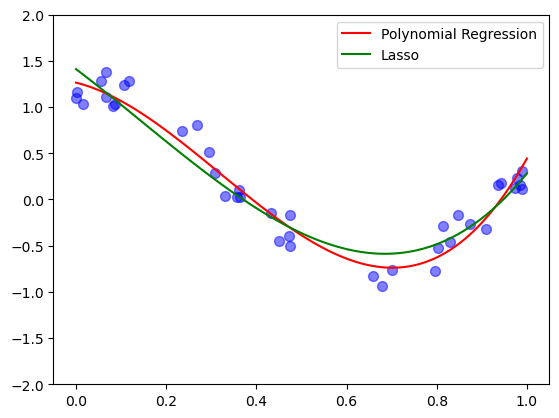

In [53]:
polymodel = PolynomialFeatures(degree=3, include_bias=True)
data=polymodel.fit_transform(X)
model1=LinearRegression()
model2=Lasso(alpha=Lambda)


model1.fit(data,y) 
model2.fit(data,y) 


X_plot=np.linspace(0,1,100).reshape(-1,1)
X_plot_poly=polymodel.transform(X_plot)
fig=plt.figure()
plt.scatter(X,y, c='b', s=50, alpha=.5)
plt.plot(X_plot,model1.predict(X_plot_poly),'-r', label='Polynomial Regression')
plt.plot(X_plot,model2.predict(X_plot_poly),'-g', label='Lasso')
plt.legend()
plt.ylim(-2,2)
fig.show()

In [54]:
y_pred1=model1.predict(polymodel.transform(X))
y_pred2=model2.predict(polymodel.transform(X))

Loss1=((y_pred1-y)**2).mean() +  Lambda*(np.abs(model1.coef_)).sum()
Loss2=((y_pred2-y)**2).mean() +  Lambda*(np.abs(model2.coef_)).sum()
Loss1,Loss2
print(f' Loss of Poly. Reg. Model with L1 Reg= {Loss1:.3f} \n Loss of Lasso Model with L1 Reg = {Loss2:.3f}')
print(f' Weights of Poly. Reg. Model= {model1.coef_[1:]} \n Weights of Lasso Model= {model2.coef_[1:]}')

 Loss of Poly. Reg. Model with L1 Reg= 0.046 
 Loss of Lasso Model with L1 Reg = 0.046
 Weights of Poly. Reg. Model= [-1.198 -8.8    9.177] 
 Weights of Lasso Model= [-3.707 -1.949  4.527]


Let's see what happens to loss in both of our models if we start increasing complexity:

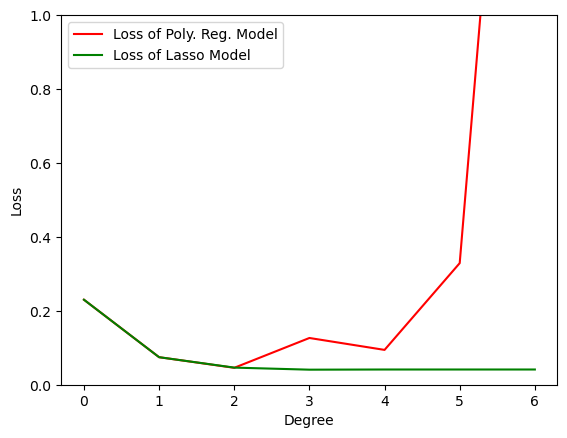

In [55]:
Loss1, Loss2= [],[]

for deg in range(1,8):
    polymodel = PolynomialFeatures(degree=deg, include_bias=True)
    data=polymodel.fit_transform(X)
    model1=LinearRegression()
    model2=Lasso(alpha=Lambda)
    
    
    model1.fit(data,y) 
    model2.fit(data,y) 
  
    y_pred1=model1.predict(polymodel.transform(X))
    y_pred2=model2.predict(polymodel.transform(X))
    
    Loss1.append(((y_pred1-y)**2).mean() +  Lambda*(np.abs(model1.coef_)).sum())
    Loss2.append(((y_pred2-y)**2).mean() +  Lambda*(np.abs(model2.coef_)).sum())

fig=plt.figure()
xv=np.arange(0,deg)
plt.plot(xv,Loss1,'-r', label='Loss of Poly. Reg. Model')
plt.plot(xv,Loss2,'-g', label='Loss of Lasso Model')
plt.ylim(0,1)
plt.ylabel("Loss")
plt.xlabel('Degree')
plt.legend()
plt.show()


As you can see, as we increase our complexity, the regularization term makes our loss go up. Since Lasso model tries to minimize both complexity and loss, it generally makes most of the weights be zero. 

For $L2-Regularization$ we use "Ridge" instead of "Lasso":

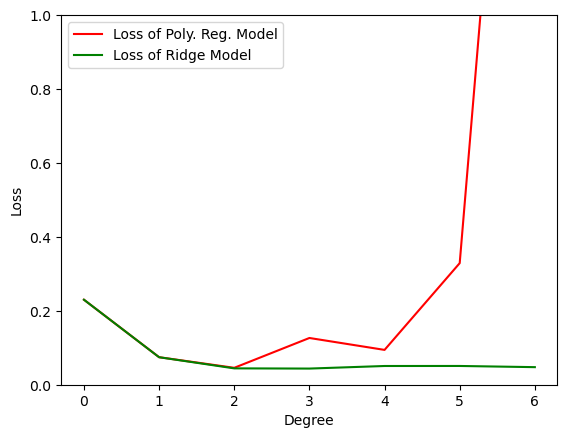

In [57]:
Loss1, Loss2= [],[]

for deg in range(1,8):
    polymodel = PolynomialFeatures(degree=deg, include_bias=True)
    data=polymodel.fit_transform(X)
    model1=LinearRegression()
    model2=Ridge(alpha=Lambda)
    
    
    model1.fit(data,y) 
    model2.fit(data,y) 
  
    y_pred1=model1.predict(polymodel.transform(X))
    y_pred2=model2.predict(polymodel.transform(X))
    
    Loss1.append(((y_pred1-y)**2).mean() +  Lambda*(np.abs(model1.coef_)).sum())
    Loss2.append(((y_pred2-y)**2).mean() +  Lambda*(np.abs(model2.coef_)).sum())

fig=plt.figure()
xv=np.arange(0,deg)
plt.plot(xv,Loss1,'-r', label='Loss of Poly. Reg. Model')
plt.plot(xv,Loss2,'-g', label='Loss of Ridge Model')
plt.ylim(0,1)
plt.ylabel("Loss")
plt.xlabel('Degree')
plt.legend()
plt.show()

So which regularization to use? In majority of cases, $L2-Regularization$ performs the same or better. Main benefit of $L1-Regularization$ is that it can shrink some coefficients to zero (removing less important features) and is mostly used whe you expect only a few features to be important.